In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


**fill the missing values**

In [5]:
#step1-fill the missing values and find the median
import math
med_bedrooms = math.floor(df.bedrooms.median())

In [6]:
df.bedrooms = df.bedrooms.fillna(med_bedrooms)

In [7]:
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


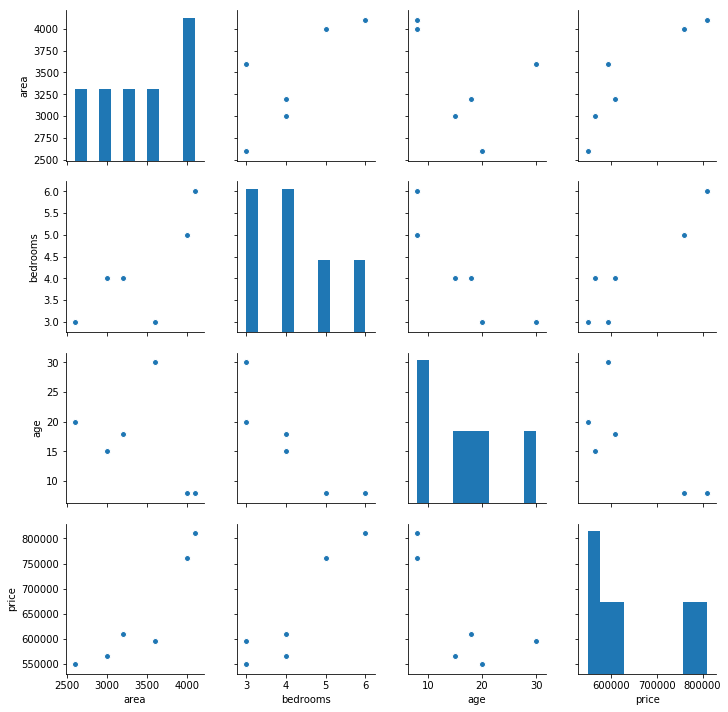

In [8]:
#Step 2 - Plot the Seaborn Pairplot
sns.pairplot(df)

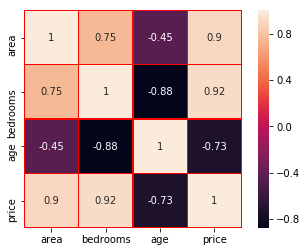

In [9]:
#Step 3 - Plot the Seaborn Heatmap
sns.heatmap(df.corr(),linewidth = 0.2, vmax=1.0, square=True, linecolor='red',annot=True)

In [10]:
#Step 4 - Extract the Features and Labels
features = df.iloc[:,0:-1].values
labels = df.iloc[:,-1].values

In [11]:
#Step 5 - Cross Validation (train_test_split)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels,test_size=0.3,random_state=0)

In [12]:
#Step 6 - Create the Linear Model (LinearRegression)
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#Step 7 - Interpreting the Coefficient and the Intercept
y_pred = regressor.predict(X_test)

In [14]:
#Step 8 - Interpreting the Coefficient and the Intercept

print(regressor.coef_)
print(regressor.intercept_)

[    236.25 -175125.    -19125.  ]
843624.9999999998


In [15]:
#Step 9 - Predict the Score (% Accuracy)
print('Train Score :', regressor.score(X_train,y_train))
print('Test Score:', regressor.score(X_test,y_test))

Train Score : 1.0
Test Score: -1.1820507812499814


In [16]:
#Step 10- Verification of the Predicted Value

#y = b0 + b1*x1 + b2*x2 + b3*x3 + ... + bn*xn

y_output0 = regressor.intercept_ + regressor.coef_[0]*X_test[0][0] + regressor.coef_[1]*X_test[0][1] + regressor.coef_[2]*X_test[0][2]

y_output1 = regressor.intercept_ + regressor.coef_[0]*X_test[1][0] + regressor.coef_[1]*X_test[1][1] + regressor.coef_[2]*X_test[1][2] 

In [17]:
#Step 11- Calculate the MSE and RMSE

from sklearn import metrics

print('MSE :', metrics.mean_squared_error(y_test,y_pred))

print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MSE : 21820507812.499813
RMSE : 147717.66249335188
